In [1]:
import pandas as pd
import numpy as np

In [2]:
data_text=pd.read_csv('Final_Text.csv')
test_text=pd.read_csv('Final_test_text.csv')

In [3]:
print(data_text.head(5))
print(data_text.tail(5))

   Unnamed: 0                                               text description
0           0  RT @SchudioTv: Want to know more about #autism...    Surprise
1           1  We blame ourselves and feel worse. Start with ...        Fear
2           2  RT @PsychiatristCNS: 130,000 patient years and...    Surprise
3           3  RT @SkypeTherapist: See a therapist online ove...      Normal
4           4  RT @PsychiatristCNS: 130,000 patient years and...    Surprise
       Unnamed: 0                                               text  \
56819       15995  i just had a very brief time in the beanbag an...   
56820       15996  i am now turning and i feel pathetic that i am...   
56821       15997                     i feel strong and good overall   
56822       15998  i feel like this was such a rude comment and i...   
56823       15999  i know a lot but i feel so stupid because i ca...   

      description  
56819     Sadness  
56820     Sadness  
56821       Happy  
56822       Anger  
56823

In [4]:
data_text.shape

(56824, 3)

In [5]:
data_text.sample

<bound method NDFrame.sample of        Unnamed: 0                                               text  \
0               0  RT @SchudioTv: Want to know more about #autism...   
1               1  We blame ourselves and feel worse. Start with ...   
2               2  RT @PsychiatristCNS: 130,000 patient years and...   
3               3  RT @SkypeTherapist: See a therapist online ove...   
4               4  RT @PsychiatristCNS: 130,000 patient years and...   
...           ...                                                ...   
56819       15995  i just had a very brief time in the beanbag an...   
56820       15996  i am now turning and i feel pathetic that i am...   
56821       15997                     i feel strong and good overall   
56822       15998  i feel like this was such a rude comment and i...   
56823       15999  i know a lot but i feel so stupid because i ca...   

      description  
0        Surprise  
1            Fear  
2        Surprise  
3          Normal  
4  

In [6]:
print(data_text['description'].value_counts(normalize=False))

Happy       19105
Sadness     13785
Fear         8161
Anger        6456
Surprise     5153
Normal       2860
Love         1304
Name: description, dtype: int64


In [7]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

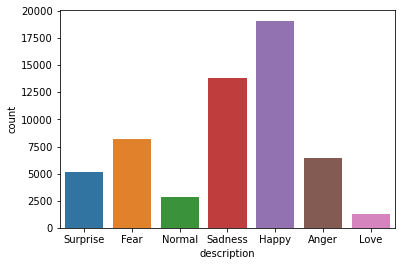

In [8]:
import seaborn as sns
sns.countplot(x='description',data=data_text)

In [9]:
data_text['text_length'] = data_text['text'].astype(str).apply(len)
data_text['text_word_count'] = data_text['text'].apply(lambda x: len(str(x).split()))

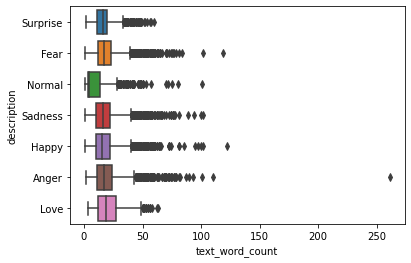

In [10]:
sns.boxplot(x="text_word_count", y="description", data=data_text)

In [11]:
import re 
import string 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import os
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import unicodedata
from nltk import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [12]:
[print(i) for i in data_text['text']]

RT @SchudioTv: Want to know more about #autism and #anxiety? Watch this short clip below...\n\nClick here to enrol ➡️ https://t.co/nTSj2BRt47…
We blame ourselves and feel worse. Start with self-compassion. We deserve it. 💜\n\n#SelfLoveIsTheBestLove #selflove… https://t.co/FPYRZHdCEr
RT @PsychiatristCNS: 130,000 patient years and the diagnostic stability of #BipolarDisorder: Study finds frequent dx shifts related to BD,…
RT @SkypeTherapist: See a therapist online over Skype - Learn How to Overcome #Anxiety &amp; #Depression without meds. Go to: https://t.co/IMM0…
RT @PsychiatristCNS: 130,000 patient years and the diagnostic stability of #BipolarDisorder: Study finds frequent dx shifts related to BD,…
The onset of the #pandemic &amp; #WFH has led to an increasing number of cases of #heartburn &amp; acid reflux. Majority of… https://t.co/tYHPcNjdi0
#Climate change is concerning. \n\nThese can create #climateanxiety for some people.\n\nThere are actions you can take… https://t.co/2lNfzYc1S

Do you know!!!\n#Salak #plantbased #vitamins #healthylifestyle #healthy #healthyfood #healthyliving #food #fruits… https://t.co/hCUG67vbjz
RT @RedditMemes18: But wait, there's more! \n/r/dankmemes\n\n#meme #memes #funny #dankmemes #memesdaily #funnymemes #lol #follow #humor #like…
RT @StoreStudy: #gk #factinhindi #sagarnadini #mindmap (Mania) #mcq #superfaststudystore #superfaststudyquiz #sss #indoreacademy #navalsir…
RT @StoreStudy: #factinhindi #sagarnadini #mindmap (Mania) #mcq #superfaststudystore #superfaststudyquiz #sss #indoreacademy #navalsir #eng…
#myself #ootd #happy #instalike #moda #fashionblogger #cute #photo #followforfollowback #bhfyp #Holiday2020⁣… https://t.co/av1HbfAMrU
RT @StoreStudy: #factinhindi #sagarnadini #mindmap (Mania) #mcq #superfaststudystore #superfaststudyquiz #sss #indoreacademy #navalsir #eng…
RT @StoreStudy: #gk #factinhindi #sagarnadini #mindmap (Mania) #mcq #superfaststudystore #superfaststudyquiz #sss #indoreacademy #navalsir…
RT @StoreStudy: Englis

Onley Dreams Infinty-Statement Mugs- Buy one of Ours or Design your own! https://t.co/kmV6bpwS4d\n#mugs, #statement,… https://t.co/OyrhMEUOHM
20 However, don’t rejoice that the spirits submit to you, but rejoice that your names are written in heaven.”\nLuke… https://t.co/6BAOIUSqkQ
RT @celestialsGaia: 📷Donna Pagakia #SacredGaia #ILoveyou💕#Xoxo #EternalLove #DivineHeart #Harmony #Peace #HeavenOnEarth #bliss #poem #poetr…
RT @celestialsGaia: 📷Donna Pagakia #SacredGaia #ILoveyou💕#Xoxo #EternalLove #DivineHeart #Harmony #Peace #HeavenOnEarth #bliss #poem #poetr…
#NiraamayaExperience #NiraamayaRetreats #Relax #Rejuvenate #Rejoice #Bespoke #MindfulLiving #WellnessLifestyle… https://t.co/n4RDNQQrRJ
RT @celestialsGaia: 📷Donna Pagakia #SacredGaia #ILoveyou💕#Xoxo #EternalLove #DivineHeart #Harmony #Peace #HeavenOnEarth #bliss #poem #poetr…
#Blessed are ye, when men shall revile you, and persecute you, and shall say all manner of evil against you falsely… https://t.co/4T6dopBsWh
RT @celestialsGai

HAPPY GLODAY KING SOSA @ChiefKeef
RT @247LC: Happy birthday Joseph Marcell, 73! https://t.co/cu0ZLWUCNe
RT @mimix1991: Happy Chinese Valentine's Day!\n七夕快乐呀宝贝 😘 @warwanarat \n\n@jellysung2 &amp; I prepared pocky bouquet for baby as we noticed from on…
RT @moliboli7: 😊💗Happy Chinese Valentine's Day 💗🎉🎋 🍄🌙\n\n#杀铃 #殺りん #Sessrin https://t.co/5bKMnK0LMV
RT @soompi: He has many ways to win hearts 😍\nhttps://t.co/p6E8uJKhvU
@maiamofficial Happy Independence day wishes
happy 6k ate vy @he4rtn wavyuuu always!🤍🤍
RT @Troll_Cinema: Happy Independence day! #IndiaAt75  #சுதந்திரதினம்\n#IndiaIndependenceDay https://t.co/ikjkhdUxu1
RT @wewantgreen: Happy Independence Day https://t.co/OrKzOk2G7K
RT @PuneethRajkumar: Happy Birthday @SanthoshAnand15 ✨
@mackdaddymakeya Nice try, I found out. Happy Birthday handsome x Love ya guts 😘
RT @seethakkaMLA: Saare jahaan se achha HINDUSTAN HAMARA 🙏\nHappy #indiaIndependenceday \n\n#AzadiKaAmritMahotsav #Independence @RahulGandhi @…
RT @GadhaMazdoori: Happy Indepen

@mylan4 ik wou jou heel persoonlijk benoemen, dus die is nog in de maak! #Present #wachtmer
of losing the people I love
The passengers looked horrified . 
Is it just me or does anyone else out there love the smell of their fella post  
About to bomb this physics test 
good morning world! 
A merciful wave was closing over it , healing her despair . 
Relative's death.
☁☾ &quot;FEAR Can Keep Us Up All Night Long, but... F A I T H Makes One Fine Pillow&quot; ~unk  
Eating my first candy cane of the season 
SHE was once considered one of the world 's most beautiful women , but yesterday every line etched on Britt Ekland 's face told a story of personal anguish . 
Before giving a seminar to a rather large audience.
I wish I was in london so I could go to trafalgar square @Louis_Tomlinson I wish I could meet you all 
 yes . It seems she can never accept a childless marriage . We had a fight last night . 
smh im really sad. the only basketball i have to look forward too is march madness????  


I don't use to lie to my parets about what I do, and the two times that I felt anger were when they doubted me I said that I was going to the club, and they didn't believe me because the day before they had met me at FLIPERAMA. I had the wish to kill them.
He watched , felt indignant but also justified because he was right . 
Finding money in a pear of pants 
Once I was alone at home. I suddenly felt unwell and there was no one to help me and call First Aid.
naaah..I don't feel my birthday tomorrow. Because i didn't get a reply from @jamesmaslow  .ouch...:(
@TheBodyShopUK at christmas, is lots of sparkly things twinkling away &amp; looking magical
 I am 24 . 
I Know It Ain't Been The Best But It Surly Ain't Been The Worst 
 The exam ! The terrible exam ! I'm not ready yet . Can you tell me how to get good marks ? 
is adaptive. Without it, we would perish as a species. Fear of fear, the unwillingness to experience irrational fear, is #anxiety.
 Well , then , may I invite you for the nex

@TheBodyShopUK nearly lost dad last month after having an anaphylactic shock. All you need is family, nothing else x
Ohh this messy breakfast of mine!!! ☺ 
 I just lost my job . My boss just told me . 
Trying to hide her enormous delight in his return , Juliet turned to David . 
Holding in is like holding a grenade after pulling the pin 1:It's stupid 2:it/you are going to explode at any moment
Work is too boring. Just me myself and i. And twitter. And random people that walk in from time to time. 
About to pick out some outfits for family pictures. Alone. 
@frankie_rf was taking a break from christmas shopping 
When I came back from work one day, the friends of my son told me that he had not come back from school and that he was lost.
Just found out my first supervisor (after college) passed away last year.  I wish I'd known.  He was such a cool dude.  
Jazzy  really moving like shit . 
The holiday season just rocks!  
I went to the dining hall and found that the cooks were cleaning th

Stoke and PSG have cost me £71 tonight! 
I have no idea what my life will look like a year from now. #excitement #revelation #trust #fb
 You can't do that ! You can't charge me for a mistake that you made ! 
Made the wrong choice, again. 
Christmas lights are strung on everything in sight!   and 
I was asked to join my friend in a boat at Lake Malawi and when making a turn, it seemed as if the boat would sink on the side.
Truth talks always make you feel different after. 
When I saw a person I had not seen for a long time.
Relatives , too , seem concerned about lack of communication and the ` unavailability of the nurses " . 
Still beyond sick &amp; I have work yet again tomorrow. 
My heart and mind are with you, Virginia Tech. Stay safe everyone. 
 Two weeks 
not afraid of tomorrow, for I have seen yesterday and I love today #less
 I do ? 
When u  ur good, u r demonstrating  The quality of strengthens it &amp; makes it more vibrant. @sourcelessons
Everytime someone says I am lucky, I 

 You're right . Lifelong learning is about finding learning opportunities at all ages and in numerous contexts 
and loathing in las Vegas miss elleray u need to b with me right now it's just not the same gonzo :) zx
My ex a quadruple hoe!! Sumbodi need to gne stop playin w/ her Lil scary...DA LOUDEST DOG N DA POUND KEEP HIS TAIL TUCKED N HIS ASS!! 
@knappalapalin ridiculous how much that tweet relates to my daily life. 
German last lesson friday; oh 
5mo asleep for the night, house clean, 3yo &amp; husband out picking up MIL. All I have to do is SIT QUIETLY. 
@Goesje en er komt ook een nieuwe cd. 
 That ’ s great , because it uses natural materials rather than ones that scientists make themselves . I prefer natural remedies to man-made ones . 
At a success of mine, at a real achievement.
Missing Judas Priest's farewell tour in Toronto tonight. 
@Yupits_Rohit well no test tomorrow its Sunday but I have to submit a paper online&amp; 2 more for Monday I really dont have enough time :[
Str

Meddlesomeness of my mother about the way I live. She thinks I am to free in my behavior for instance when a boyfriend stays the night.
not afraid of tomorrow, for I have seen yesterday and I love today less.....
DO NOT REMEMBER.
Sitting here while  Justin does his freaking exam. lol. He needs to hurry!
Alas, no good trending topics to mock today. 
Thames Valley Police are known to be furious about the case . 
Yesterday I read in the newspaper that a 30 year old woman had abused her 2 month old son and had caused his death.  I was very angry after reading this as this is not a human act and to abuse so fragile a life is not a forgivable sin.
 I think you can go to visit the museum . It's worth seeing . You can go to the square some other time . 
 Julie ! It's good to see you again . How have you been ? 
 Congratulations ! Susan . I ’ m so happy for you . 
 That ’ s right . I have a lot to learn from you . 
I go along and watch women 's football and get really infuriated to see a man ou

Getting a seat on the train makes me full of 
When I went home alone early in the morning, I had to go through a wood.
I've just realized tonight it'll be the last Sectionals with the actual awesome cast :(  
Mr Mitterrand appears so delighted with the ultra courteous Edouard Balladur , that some Socialists wonder whether he has at last found the prime minister of his dreams . 
Barbarossa sent a mandate requiring Milan to give up her claims , but the Milanese consuls tore up the document , and the imperial ambassador fled an enraged crowd . 
wonder if i'll get on espn. Strange how im like the only Big Star player not on ESPN. 
@AimeeTweets4U &quot;The of the LORD is revealed from heaven..&quot;helps us understand God's righteousness. He hates sin,&amp; loves sinners! US!
I think I'm scared of what the future holds, I was wishing for some things and now I'm used to those 
Just met a nuclear engineer from Los alamos who grew up on the farm in Iowa. 
Typically , Gould 's infrequent letter

@mo0re_ofTayla yeah my phone's dead.........and my chargers missing from next to my bed..... #O
I did not quite succeed in breast feeding my baby.
It's a huge part of my life and I can't tell anybody except SOME family.. 
Learning count on me in guitar! 
The note said Imro was concerned there might be ` similar undetected shenanigans " in other occupational pension schemes . 
things that never get better with time, putting the cover on your duvet. 
A patient in an anxious state is more likely to bump into , or trip over , objects ; shaking or tense hands are more likely to drop things , spill things and so on . 
Fk Is his tv ever annoyin -_- its not like he would lower it so I wouldn't have to hear it all night nono he wants to share the fun -_- 
earthquake.
When I was misleaded by a person who assured that something would not occur, that I had no reason to prepccupy myself, and suddenly I saw myself implicated by the fact, because of the incompetence, and irresponsibility of that pers

I hate that moment when your on top of the world, happier then ever then something has to sweep it out from under you...  
 Thank you ! 
One day I heard from a friend that the boy I loved had gone out with her and not with me.
and then sent out the ladder. This is just another reason why I am quitting lance. 
@a_vastano don't worry my sickness will fill the room with !!
Sooo im hearing bad things for Duck fans tonight..do i need to start yelling at the tv? 
I love it when coaches send me preaches over text message.  
He paced about for some time , looking agitated . 
 You too.Thanks for dropping in . 
Also, Leah brought home a single slice of apple pie, and our Evil Other Roommate ate it while I slept.  
 No wonder . 
Morning all! Another day another dollar! 
I got lied to! No Victoria secret fashion show tonight? 
 Not at all . 
“@Kasheyy_HD: @matt_reeves10 I hate this class. I hate school. I hate Mr. Pruitt! Learn to talk! Go kill yourself. writing” the truth
“@RevRunWisdom not afrai

Lost my phone charger. 
@amyhazelhansen I don't know but I feel like death. 
When my gradmother died.  I felt very sad then ... The feeling started to be worse after a while.
 Certainly not . 
Student being harassed because he argued with a teacher. He might have to go on his knees and beg for his admit card nw. #heartless
All my high school nights out til 4 and working at 8 has trained my body well for today. Woke up at 5, working from 10-6 
Former  who were   now speak without and openly #pray for your #safety and #success tomorrow. #occupycolleges
Take My Crown To The Grave Im An Underground Queen 
@Anna_Brown_1 I have to keep my mouth shut or ill give it away #:O
Type to focus and study! 
“@RevRunWisdom: not afraid of tomorrow, for I have seen yesterday and I love today #less”
 I will . 
My Lord Mayor , I 'm delighted to have this opportunity to debate the Government 's health reforms again . 
Gotta get up wayyy to early tomorrow. That what I get for d-hall. 
Break! Imagine yoursel

Just heard the most beautiful sound of carolers singing outside my window. #peace
 Yes . 
 Because I feel tired all the time , even when I wake up in the morning . I find it very difficult to do any work . I have no appetite . 
Kansas St. is trending nationwide. Too bad they didn't win 
 Parents usually give their children more freedom in my country . Sometimes they give them too much freedom . 
- being call fat is horrible fair does 
Just accidentally allowed my skink to lick my tongue because I was mimicking her way too close to her face.....#fml
 Yes ? 
i should clarify: we're winning the *game* of terror, not the war on it. america terrorizes like fucking no one does. still, plenty to 
Highlight of my holiday so far... My pumpkin pie &amp; whipped cream and playing words with friends with my boyfriends mom #thanksgiving
I get angry when my smaller brother misbehaves and talks with indecent words.
@kellybrooke57 just made my night. What a  awesome 
Driving back to sa and I think my 

Despite the sadness of the occasion , many gave way to hysterical giggling as they gradually realized that every compartment contained mourners or corpses . 
New Christmas music book? My favoriteeeee! #thanksdaddy
This time , with deepening anger on the streets over price liberalisation , the hardliners were not to forgo their chance . 
I was so sad when I heard that my Uncle had passed away. He was the only man who was supporting my parents as well as myself.
 Maybe tonight . I don't know . I don't know how to tell her . 
After a long time I saw my boy-friend again. 
Laura 's normally full , warm lips tightened with annoyance . 
@char_wiggy not gonna lie, was on a foul mood when I woke up and it hadn't arrived, just ask @KerryLovell 
Don't look at me, think about me, talk about me, or ask about me.. Wowww whens this shit gnna end 
Someone must have buried them when they were too frightened to hand them in to the police station . 
@jbhuet Et alors? &quot;Tant qu'on a pas vendu on a pas

He says that he was so mad that he got a knife to scare them . 
Bernice was so angry she could hardly speak . 
Rachel and her mother looked agitated . 
let pasukan do that haha RT @shelaaashelooo: Hai,who wanna kill me? I'm tired with what I feel,I'm tired of this sickness
The wind just sounded like a woman SCREAMING. #helterskelter
I hope the rest of this little vacation is better than the past two days...
 Oh , the final exam is coming soon . I feel a little bit nervous . 
When people suck on their teeth &lt; 
How dare we let it motivate us, how dare we let it into our decision making, into our lively hoods, into our relationships.
After a motor accident (I was the frong-seat-passenger) I spit blood.
She still , after all these years , did not know , and one hand clenched in involuntary anguish at what she thought of as her intolerable betrayal of her brother . 
my humble prediction 1252-1260 all day...  hope I'm wrong either way, trade the range!
 sure . Good luck , Maria ! 
One thi

&quot;The happiest people don't necessarily have the best of everything.....they just MAKE the best of everything.&quot; 
When I was betrayed by a friend, and decided to stay apart form her.
What the fuck is the point of choosing not to excercise? To me it shows you have no self respect and a lack of ambition 
When I told here were going to get her birthday gift she was all smiles!! 
This guy didn't wear his vest today 
To misquote you : he is itinerant because he is miserable . " 
 I guess so . 
I am a school teacher.  One of the classes does not obey me at all, keeps on talking, does no work.  One afternoon, everything went wrong, and I got exceedingly angry.
Towards the end of that video I prompted an exchange about Neck Tattoo Barbie through the chatroom,  they were pro-neck tats 
@gcraige just as MLK fought for blacks to have EQUAL rights, so do homosexuals. According to the bible we should still own slaves! 
Before an exam.
Guy next to me had 3 Jack and diet cokes on 50 minute fl

Alexandra grew even crosser as it became obvious that Matthew had been invited in his own right . 
“@RevRunWisdom not afraid of tomorrow, for I have seen yesterday and I love today #less”
When I heard the news that my grandfather had died.
 I felt as if I had been in a different world . 
@karenstivali I will try it. it's been a while since it happened, this is the first time i could tolerate touching the keyboard 
dude wants @fanzoid321 to drive to crafton for pot. now we're all even @fanzinator. josh is the one needing laid tho. help him guys
Antoine Carr.... man those were the days RT @NepeanTX: Now that Shaq is retired, no active NBA player has dunked on Antoine Carr. 
2 hours in a cold as waiting room is the perfect way to spend a friday -_- 
Day 1 of Extreme Home Makeover Claffey Edition with @staceyclaffey. Hope @ShawiClaff appreciates his new humble abode! 
@Jennatot you had to invite yourself! HA! it's the DCH student night out #minusthetwats please come over b4 xmas- I'll make

I wanted to see a friend, I had been looking forward to it and had certain expectations, but he did not pay any attention to me, played cards with other people.
@SpencerHowson &quot;should present  all year (IMHO of course)&quot; I'd rather Ch9 just ran an intermission. 30mins of light music. 
I dont know how I can let someone in again, the of a repeat is greater than my fear of being shot... #Rough
Then she must sit in the sun before hauling it back up and altogether I was enraged and wished I was in a condition to show her how it should be done . 
Don't be shy . Have some more chicken . 
When I tried to put up a tent some years ago, I was teased and hindered by my cousin.
@greysonchance is trying to KILL US THIS WEEK. New haircut,  Raising Hope, and his for ASIA! OMGOMGOMG #superexcited
 Are they ? 
@TheBodyShopUK Sparkles and glitter definitely bring me especially over the Christmas period!
Praying for patience or peace? If you have the Holy Spirit in you, you already have patience 

odeio ouvir um disco legal,procurar um lugar pra baixa-lo e não encontrar!!!! =S ( )
Just bought a treat for some friends @flyncupcake and when I delivered found out they just became a sponsor. #ilovemyjob
 I can smell smoke ! 
Just to follow the crowd...@JakobOlsen2 I have had a crush on you since sophomore year LA HAPPY BIRTHDAY!!!
Dome squad 2012. Rude. Ronchy. Ruthless. 
spca tomorrow for community service.. 
 Thank you . I suppose I should go to see a doctor . 
l will sleep back nah. Good darky cold nite. 
Off to the cinema to see Dream House 
 Why not ? 
When I understood that my marriage was falling apart, and we decided to be legally separated.
 Thanks ! 
Damaged the tap in the residental Hall.
@grespo era meglio quella dove c'ero io. 
Have to read a book an write a paper on it in 8 days. 
He saw her glance up in puzzlement and ask why he was still fully dressed . 
What a terrible house ! 
Lunch with the old folks at the club then heading back up to tampa 
THE LOCKOUT IS OVER! 

I am pleased that they have responded very positively . 
He had a narrow mournful face , tapering to a long pointed chin . 
January 6th; Wizards of Waverly place premiers the final episode. it's gonna be a long, long, long, long day for me. .___________. 
 No wonder you say English is a crazy language . 
Sint zat te denken.... Help, ik wacht al een week op inspiratie en die komt maar niet. Morgen moet en rijm klaar zijn!!!
 I know , it's not as I had planned . 
New theory: if everyone started their day w/ hot cocoa and marshmallows, the world would be a more joyous place 
Isa pa naman c MARK sa pinaka magaling sa  sayang naman ang gwapo pa naman ni Mark 
What are we going to do ? I can't get the car out of this ditch . I'm stuck ! 
 It's us . 
Found the mosquito in the shower.  
` I am desperately sad that our scheme did not come to fruition but I am glad that someone will take it over and bring these jobs to the area . 
Lekker naar huis. Dadelijk nog even verder knutselen en dan is de

MOTD fail to show our stonewall penalty 
Me too :'( RT @Hanan_Juffali: I'm sooooooo sleeepy but I don't want the weekend to end 
Try to enjoy your fuckin birthday dude ;) 
Good luck w that RT @GMFuller1971 Its been my pleasure to watch the  stifle the  during the first half of the game. 
Don't allow to silence you! That's a trick of the enemy!
 Well , Rose . 
Packing to leave tomorrow 
Flora 's eyes were downcast too ; they usually were . 
There's no trusting anyone these days, not even the people u think u can trust most 
Peace is that state in which fear of any kind is unknown. --John Buchan  Fill your w/ #love...it is no match!
How are you ? 
I feel like crap... I just wanna go crawl in my bed and go to sleep! Not ready for school tomorrow! #not
I hate to disappoint anyone but that was n't the case -- although the veiled hints caused us plenty of amusement . 
 The black ball has to be the final ball in the pockets . 
A younger brother of a good friend of mine died (asthma).
One time

Being subject to unfair treatment in a working group, someone \bending the rules\" was protected by the boss. This resulted in more work for the others."
 Bye . 
From the other end of the table Ymor watched with mild amusement , occasionally feeding one of his ravens with scraps from his plate . 
late night shopping 
 oh . 
Standing in a crowed shop or in a closed room with too much people in it. This gives me a fearful experience.
Thanks for your prayers. Paloma is out of the hospital. The pediatricians and nurses at Dover Kent are phenomenal! 
If u smack ur lips while u eat in my vicinity best believe I'll rip your face off and wear it to church. 
 Ohio . 
Most Germans looked on stunned as the results from the two state elections on 5 April flashed across their television screens . 
 RT: @katjabecker: Joe Nathan left the Twins for the Texas Rangers.  
While all you psychotic people are out  for  I'll be sleeping. #winning
The old hands at machine knitting glibly talk about ` two-thir

So many little white blocks and chinese writing on my TL that I don't understand #TeamBlackberry
gotta get up in 6 hours to ride a plane 
@SHAYL0VE  is loving my thanksgiving right now!!! While I'm at a football game 
 why do I always run into the same gross student? 
@_marionnette Non, c'est pas drôle. JONGHYUN DOIT DOMINER. Mais j'ai trouvé un moyen pour te faire te calmer.......... 
Hair done. Feeling Fresh! 
Ryan fitzpatrick got the rock ross beard da beard
@J_cabs2 lmao tehe but anywayss yeah whatever its no problem lol ill just do the homework from friday and youll copy it tmwrrr aight?
Oh my lord  is so good tonight &amp; yet so wrong @chefanneburrell or @gzchef is going home. I knew this moment would come 
Taking as his theme the great rivers of the world , the Ganges , the Jordan , the Mississippi , the Clyde -- and of course the Boyne -- he weaves a tapestry evoking both sorrow and joy . 
laatste dingetjes doen en dan ben ik eindelijk klaar 
Today I spent 15minutes getting re

The death of my grandfather.
Have you signed up to join the company ’ s Christmas party ? 
@ergish Yes sir. Break duty :) 
Is wanting @AxelLoitz to be healthy to join me back in the paint 
 Frank has gone out with Lucy again . 
 of course . There ’ s always much to learn . I got to know more about the real world . 
I felt happy when my mother borrowed me the car in order to let me go out alone for the first time.
@Ema_Mc haha :) don't get to excited. Ok I'll see u tomorrow some time :) xx
 That's very good . It's said that marriage is the Ab of love . But the words may not be right . 
Highs in the 80's here in Palm Springs today! Ahhh...will be beautiful &amp; I get to spend Thanksgiving Part Deux w/mom &amp; grandma. 
that Oregon-USC game was fucking STUPID. I hope someone punched that kicker in the face. #oregonducks
I'm really happy its Friday, but I can not wait for tomorrow! 
Heartache sucks.....but the people God has placed in my Life man I'm so thankful no  no evil Just  and 
Th

Isn't this lovely weather ? Will you help me water the flowers , Jack ? 
i hate seeing people cry, makes me wanna cry 
@chrisjrn Well, you are lucky I guess #discrimination #past #suchislife blah... blah... blah... :S
&quot;Find  in life; the mere sense of living is enough.&quot;&#xA;Emily Dickinson #quote
Realistic bad dreams really suck, especially when about someone close to you. Must resist urge to call them at 3 am... 
` I 'm delighted you 're so pleased to see me . " 
I experienced it when I was accepted at the Medical Higher Institute.
I lost my heart in the beginnings of winter... And I was so convinced... 
 1999 . 
@GRRRatLife I think we are too much of horn balls for this class to be taken seriously 
@RimantsZ man nesanak, man vienkārši nesanāk :( man čist nesanāk, vienmēr visi visu par nopietnu uztver. jeb neparizi pasniedzu x4
 I haven't gone to the interview yet . It's tomorrow . I am so nervous . 
My illness a few years back.  I was severely down with malaria and asthma, 

I don't need present's of king's but just just to be in the presence of The King  #Peace #PleasuresForEvermore
For some reason I woke up thinkin it was Friday then I got to school and realized its really Monday -_- 
I loev my little babirs. I love break. I love my lifs. I love ALL OF YOY. EVERYONE. EVEYRWHERE! 
Lootje maken voor vanavond! met Hanneke, Marc en Mama
@Pkkkk_ so gassed about turning 18 he thinks hes a man your still a bitch
On the verge of crying after my intro and thesis to my paper are gone due to a computer glitch ! Now, back to the drawing board  
Just before we were to go upstairs to be photographed , an agitated Nigel Lawson came up to me saying that he wanted a word . 
 I'm sorry . That must have really been a nightmarish day for you and your family . 
Break! A FedEx guy is knocking on your door. He has a box for you. Sign for it &amp; receive it! #LJB
My afternoon consists of learning my lines for drama and finding all my school books for tomorrow. 
The dying of a 

if the @NewYorkMets do not sign Jose Reyes...seeing another 100+ loss season. 
When you're driving past @Jaans_RAWR 's house, knowing she's not there....
They wanted something to happen but I didn't.
i cant eat cause  i got to make weight  
Quand je vais dans certain coin en île de France j'ai l'impression d'être dans un autre monde cc aulney cc Clichy-sous-bois #chochotte
I was afraid when my first boyfriend threatened to make an end to our relationship because he didn't love me enough while I loved him very much.
missed the Victoria Fashion show for Soccer #shouldofDVRit
Lenin was furious when he learned about it . 
 Oh , sorry to interrupt you . But I am calling to say goodbye to you . I am awfully sorry to tell you that I am afraid I could not see you off at the airport tomorrow , because I will have to attend a very important meeting . 
like @LeToyaLuckett God didn't breathe life into us for US 2 Draaaaag thru the day!  
I kept trying to get back to Changez 's lugubrious face , wh

Thankful for quick bonding time w/ my little brothers!  ♥ ☺
When the person I'm having the affair with won't talk to me in public.
At night when I was coming from Lingadzi Inn I heard a hyena crying in the Lingadzi jungle. I was alone.
Oh look. Godswordislaw is back. Just in time for the holidays. 
@marissamccorkel like shit! Pretty much im a alcoholic now since I can't take pain meds lol and to top that split my incision open 
 To some extent , he is . And what do you think we move to a better place ? I can't see him clearly from here . 
When I saw my brother in Church, and publically accept Jesus Christ as his saviour and Lord.
sweet reunion &amp; fellowship with the worlds greatest 9th graders! you'll always be my 8th graders. @shay_stegmann @gracie_roe  
That awkward moment when u drop your fudgesicle down the stairs 
He watched , felt indignant but also justified because he was right . 
i am at home and in bed and it's only ten. what is wrong with me? oh yeah, this week kicked my 

i really lose a lot of my nesting homemaking instinct and desire when i am pregnant and the longer im pregnant the worse it gets though i do get about a month reprieve where i feel creative again around the six month mark and youll notice that is when i did a post for halloween
i feel as if this opportunity to return to moz is gods gracious gracious way of giving me that heat desire despite my own self doubt and uncertainty in the past
i feel really lucky to have found you as a resource and have always felt the answers i needed were there for the asking
i keep running up the hill and fitness wise feel fine but along with my foot my calves are starting to now hurt also as they begin to tire
i am always so sensitive and my every sense feels like it is being assaulted as i drag myself away from the darkness
i supposed i ought to feel thankful for that adding with a sarcastic edge at my age
i couldnt help but feel totally distraught and utterly helpless when lorena was kidnapped and tortur

i have struggled to fit all the work in for this module and have felt frustrated at times feeling that my blogs were rushed and although i have read with great interested fellow students blogs i feel i havent interacted as much as i could have done this is a definite area for development
i feel like i have gotten rejected by him over and over again from the time i have met him
i feel optimistic that he ll settle in before too long once we ve arrived
i am feeling a little stressed but seriously i have no one or nothing to blame but myself
i feel im being violent is i say no im not going to accept that and here are the consequences
i wonder if they would feels as delicate and pretty in my hand as they looked upon the framework of branches
i feel im back to being that bouncy little chickie i was when i first found the scene but with a lot more depth and understanding of myself and the world around me
i feel have been convinced by many factors in our culture of a kind of cooking mystique
i

ive been feeling all listless this two days
im feeling a little stressed
i feel cute because the tune of the song days of christmas played on my mind pia again almost my best friend because were going out like everyday and i can share to her almost everything and we understand together and i went out
i feel like i have suddenly lost a limb in a tragic accident
i think that when we say i feel so alone in this or i feel like i am facing this all alone we dont really mean what we say
i feel like im having something really naughty like dessert for breakfast
i feel shaken or angry that my husband keeps lying to me and is a sexaholic i often start to feel mad at god
i don t want any of you to feel left out i am offering a discount on my tea totes to you my beloved readers beginning today through april th
i also feel fearful and concerned for them both worried
ive sat there and wondered why a guy i liked hasnt texted me calling is not really my thing it makes me feel too awkward or why when h

i do have good days and bad days but the bad days are awful resulting in constant trips to the bathroom a lot of pain bloat and discomfort lots of blood and just feeling completely exhausted and rundown
i feel so pained to see students on a school trip
i feel defeated and low
im so tired i feel weepy
i duno i feel as if im doomed for ther rest of mi life
i feel like im being taken advantage of and on top of that i am really bothered by my boyfriends sloppy behaviors
i feel that learning more about animals and the amazing things they can do just points to a wondrous creator
i can spill my feelings to and tell every pathetic detail of my life
i can feel them cool but seldom empty pale with
i refuse to feel guilty
i am feeling a little sorry for myself and worse for him
i was an outsider and i never felt part as i was new that made me feel disheartened
i lost a very dear friend in the maschke family who now wants nothing to do with me because they feel that i am unsavory or mean or cruel


i was feeling quite something im not sure
im feeling a little bit apprehensive about entering a new chapter again and having to prove myself all over again
i want to enjoy this and feel successful
i still have such a hard time writing my work down and when i do i feel its not perfect
i feel like a deprived kid
im glad that peter doesnt feel threatened or concerned by my recent interest in decidedly egalitarian almost feminist christian blogs jonalyn finchers a href http soulation
i feel like everything is just so fucked
i shouldve stopped feeling envious she has her own life i knew it but its still so hard
i feel i am seeing a series of intelligent people who have compartmentalised science and religion mostly into separate areas of their minds and not all in the same way and they are flicking backing and forth between them like radio dials
ive been kicked in the stomach by the eating disorder so many times that i feel kind of numb
i used to always throw out twd as an example of dual ex

i don t want to go all very special episode of blossom on you but i am feeling a little melancholy about the final episode of rock
i normally like some lettuce and tomatoes in my burger for moisture in their absence in this burger made the meat feel particularly rich and juicy
my sister once stole my mothers money and made her very angry after this my mother would beat her up for unreasonable reasons one day my sister lent her book to a friend without telling my mother about it when my mother learnt this she beat her up and even threatened her with a pair of scissors
i love this or that it s an unconscious attempt to cover up or remove the deep seated feelings that always accompany the ego the discontent the unhappiness the sense of insufficiency that is so familiar
im left feeling paranoid and like it keeps getting harder to feel happy
i use it all over my face and sometimes my neck if i m feeling generous
i just feel really needy
i feel agitated about it
i feel invigorated and energi

i am feeling highly frustrated because i had worked a long day and just wanted to get home and take a shower and eat my snacks and listen to some music
i believe in you moment we all feel til then it s one more skeptical song
i remember feeling shocked and somewhat embarrassed that the adf unity rite i was consecrated in was so much about me
i never feel satisfied or satiated like i used to when we were dining out
i feel pleasant staying away from the former
i hate missing practice because i feel like the reps in practice are vital to your performance on sunday
the patient whom i expected to get well suddenly passed away after he showed had his meals
i have an awesome husband i got to lay in bed for two days straight which i think is directly linked to the fact that im already feeling much better
i do feel confident that ill be able to compete on price my product is some of the most affordable on etsy but what if people would rather pay more for pompoms and multi colored braided ear fl

i still think it is worth posting here as a reminder for the next time i feel anxious
ive also made it with both sugar measurements but i feel like cup is just too sweet for me
i remember feeling outraged to my core when i read a particularly heinous series of articles in the friday times where else if not this paper
im desperately trying to stay away from black so i really am feeling proud whenever i put together a colourful outfit
i am able to write a full letter in insular minuscule and i will probably never have the skill of xviith century writing masters such as maria strick or jan van den velde but i feel that learning a craft is a worthwhile effort in and for itself
i could have possibly forgotten that would make me feel as idiotic as last years whole forgot to pack shirts thing did
i cant help but wince as i do that feeling an unpleasant tightness in my back and a dull ache in my head since ive opted for resting it against the wall behind me
i feel really pumped and also am eag

i have my drive back and am begging to feel a little bit useful again
i can not drop this class because then i lose the financial aid for not having enough credits plus i feel like a quitter and im too stubborn for that
i feel resentful toward my wife when weeks go by without sex
im feeling very virtuous having just come home from a hour yoga session with my sister whos a yoga teacher
when i heard the news that my grandfather had died
i would gladly make it on the morrow since i am not feeling well
i mean i feel that they do need them cos they get so passionate about their belief no matter how unrealistic it may be
ive come to realize i need to stop runnin away from my fears gotta stop bein so confined and wanting to hide feeling the need to die and instead stic through this vicious hell like ride
i feel awkward and laugh with me when i make mistakes and have open arms for me even though mine sometimes dangle at my sides hesitant
i didnt usually feel quite so hated at this hour of the 

i was feeling pretty grumpy at this point but for whatever reason seeing this flower made me very happy
im feeling very uptight right now
i still adhere to this to a certain extent i feel that there is a fine line
i always felt like i could do anything but now i feel so fearless
i also know on certain days when im feeling crappy its only because i didnt bring enough cigarettes
i was so scared of feeling stupid or unintelligent or why i felt like i wasnt smart enough
im starting to feel that im suffering from fatigue
i have a creative group of friends i can go to when im feeling creative
i am exceedingly lucky and i don t work this hard because i feel some sense of frustrated obligation that is resented
i feel a strange connection to them a familiarity that most of the time i link to ancestral memory
i might tackle a memoir but i feel i need to live longer before i qualify to have anything useful to say
i hang my head down and feel even more embarrassed to complaint about such minor thi

im currently struggling with feeling offended at my drs office worried about my body and what the heck is wrong very seriously contemplating getting my tubes tied and then the normal everyday things that occupy our minds at any given time
i will be able to let that passion out but at present these little paintings help me feel reassured not to let my dreams or creativity die a href https lh
i feel like an idiotic herd mentality mindless follower when i m walking down the street with a large group of people
i remember feeling such a joyful feeling when i was there
im writing this blog post and feeling totally amazed at this wonderful life we lead
i feel like i now have a cohort of people to whom to turn when i have questions about what i am doing as i move into supporting my institution s public health program
i am feeling fairly uncertain about most things right this moment
i feel very regretful i wasn t able to finish what i set out to do data url http www
i am feeling intimidated by 

i mean people are discussing things about which they feel passionate
i am supposed to go about being strong when i feel so inhibited
im not really feeling it so far though i think i liked the film better
i feel so uptight about it because i know you hate it and are constantly trying to catch glimpses of the tv in the window and listen to it
i am horrible about articulating my feelings particularly verbally sometimes i cant even remember incidents just that i was mad at something
i sure hope we do as i feel very isolated without any contact with home
i make a mistake i cringe feel idiotic and become filled with self loathing
i feel like a fake a fraud a hypocrite
i hate you for making me feel unimportant
i have definitely seen and felt many blessings from heavenly father especially on the days when things feel gloomy and lonely while mike is away working hard for our future
i feel so fake
i am in italy and i feel as useless as i could possibly feel i need to occupy my time not to get cr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [13]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [14]:
import neattext
import neattext.functions as nfx

data_text['text'] = data_text['text'].apply(nfx.remove_userhandles)
data_text['text'] = data_text['text'].apply(nfx.remove_stopwords)

In [15]:
def text_preprocessing(data,remove_stopwords=True):

    def denoise_text(text):
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        text = contractions.fix(text)
        return text
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        if remove_stopwords:
            words = remove_stopwords(words)
        #words = stem_words(words)
        words = lemmatize_verbs(words)
        return words

    def tokenize(text):
        return nltk.word_tokenize(text)

    def text_prepare(text):
        text = denoise_text(text)
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)])
        return text
    
    new_data = pd.DataFrame()
    new_data['text'] = [text_prepare(x) for x in data]
    
    return new_data

In [16]:
processed_data = text_preprocessing(data_text['text'], remove_stopwords=False)

In [17]:
type(processed_data)

pandas.core.frame.DataFrame

In [18]:
print(processed_data)

                                                    text
0      rt want know autism anxiety watch short clip n...
1      blame feel worse start selfcompassion deserve ...
2      rt one hundred and thirty thousand patient yea...
3      rt therapist online skype learn overcome anxie...
4      rt one hundred and thirty thousand patient yea...
...                                                  ...
56819         brief time beanbag say anna feel like beat
56820     turn feel pathetic wait table sub teach degree
56821                           feel strong good overall
56822                        feel like rude comment glad
56823                       know lot feel stupid portray

[56824 rows x 1 columns]


In [19]:
# Features & Labels
X_text = processed_data['text']
y = data_text['description']

In [20]:
print(processed_data)

                                                    text
0      rt want know autism anxiety watch short clip n...
1      blame feel worse start selfcompassion deserve ...
2      rt one hundred and thirty thousand patient yea...
3      rt therapist online skype learn overcome anxie...
4      rt one hundred and thirty thousand patient yea...
...                                                  ...
56819         brief time beanbag say anna feel like beat
56820     turn feel pathetic wait table sub teach degree
56821                           feel strong good overall
56822                        feel like rude comment glad
56823                       know lot feel stupid portray

[56824 rows x 1 columns]


In [21]:
# Build Pipeline
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(X_text,y)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
test_processed_data = text_preprocessing(test_text['text'], remove_stopwords=False)
y_test=test_text['description']

In [23]:
# Check Accuracy
pipe_lr.score(test_processed_data['text'],y_test)

0.8165

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_classifier = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier())])
rf_classifier.fit(X_text,y)

test_processed_data = text_preprocessing(test_text['text'], remove_stopwords=False)
y_test=test_text['description']

rf_classifier.score(test_processed_data['text'],y_test)

0.8505

In [49]:
rf_classifier.predict(['i am frightened'])

array(['Normal'], dtype=object)

In [39]:
from sklearn.naive_bayes import MultinomialNB

pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultinomialNB())])
pipe_nb.fit(X_text,y)

test_processed_data = text_preprocessing(test_text['text'], remove_stopwords=False)
y_test=test_text['description']

pipe_nb.score(test_processed_data['text'],y_test)

0.698

In [25]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
clf = svm.SVC(kernel='linear') # Linear Kernel
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
svm_model = pipe.fit(X_text, y)

In [33]:
svm_model.score(test_processed_data['text'],y_test)

0.807

In [34]:
import joblib

joblib.dump(svm_model,'svm.joblib')

['svm.joblib']